In [3]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set styling
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.2.5


In [4]:
# Cell 2: Load Data
df = pd.read_csv('../data/raw/API_SP.POP.TOTL_DS2_en_csv_v2.csv', skiprows=4)
print("✓ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

✓ Dataset loaded successfully!
Dataset shape: (266, 70)


In [5]:
# Cell 3: Initial Exploration
print("="*50)
print("DATASET OVERVIEW")
print("="*50)

print(f"\n1. Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

print("\n2. First 10 Column Names:")
print(df.columns[:10].tolist())

print("\n3. Last 10 Column Names (Recent Years):")
print(df.columns[-10:].tolist())

print("\n4. First 3 Rows:")
print(df.head(3))

print("\n5. Data Types Summary:")
print(df.dtypes.value_counts())

print(f"\n6. Total Missing Values: {df.isnull().sum().sum()}")


DATASET OVERVIEW

1. Dataset Shape: 266 rows × 70 columns

2. First 10 Column Names:
['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965']

3. Last 10 Column Names (Recent Years):
['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'Unnamed: 69']

4. First 3 Rows:
                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130075728.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   

          1965  ...         2016         2017

In [6]:
# Cell 4: Reshape Data for Analysis
# Get only year columns
year_columns = [col for col in df.columns if col.isdigit()]
print(f"Year columns found: {len(year_columns)}")
print(f"From {year_columns[0]} to {year_columns[-1]}")

# Melt the dataframe to long format
df_long = df.melt(
    id_vars=['Country Name', 'Country Code'],
    value_vars=year_columns,
    var_name='Year',
    value_name='Population'
)

# Convert types
df_long['Year'] = pd.to_numeric(df_long['Year'])
df_long['Population'] = pd.to_numeric(df_long['Population'], errors='coerce')

# Remove missing values
df_clean = df_long.dropna(subset=['Population'])

print("\nReshaped Data:")
print(df_clean.head(10))
print(f"\nCleaned Dataset Shape: {df_clean.shape}")


Year columns found: 65
From 1960 to 2024

Reshaped Data:
                  Country Name Country Code  Year   Population
0                        Aruba          ABW  1960      54922.0
1  Africa Eastern and Southern          AFE  1960  130075728.0
2                  Afghanistan          AFG  1960    9035043.0
3   Africa Western and Central          AFW  1960   97630925.0
4                       Angola          AGO  1960    5231654.0
5                      Albania          ALB  1960    1608800.0
6                      Andorra          AND  1960       9510.0
7                   Arab World          ARB  1960   91540853.0
8         United Arab Emirates          ARE  1960     131334.0
9                    Argentina          ARG  1960   20386045.0

Cleaned Dataset Shape: (17195, 4)


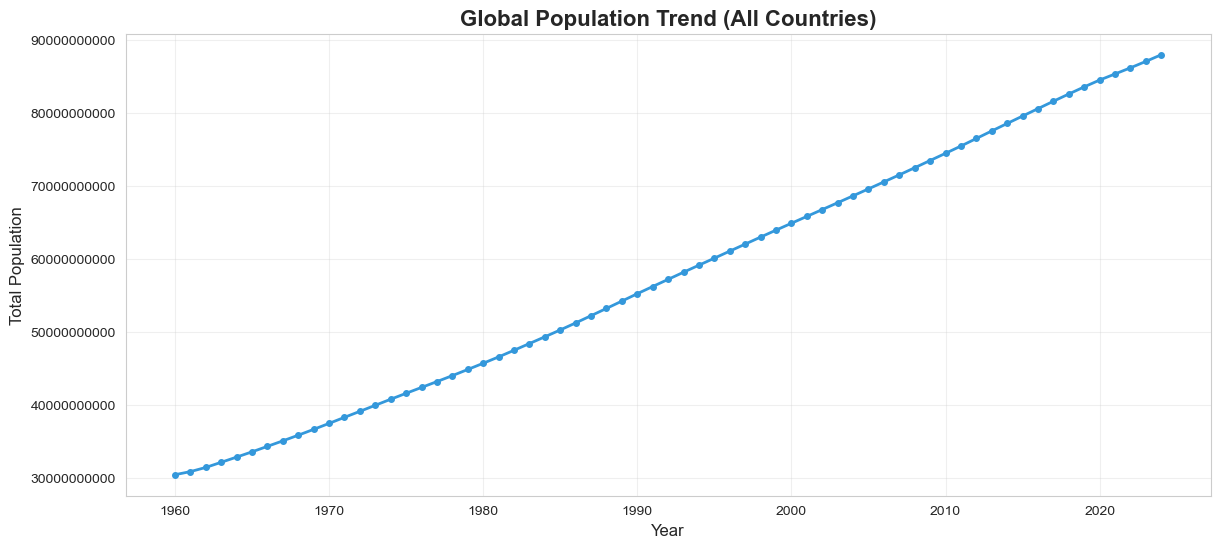

Population in 1960: 30,466,203,978
Population in 2024: 87,950,031,974
Growth: 188.7%


In [14]:
# Cell 5: World Population Trend Over Time
yearly_total = df_clean.groupby('Year')['Population'].sum()

plt.figure(figsize=(14, 6))
plt.plot(yearly_total.index, yearly_total.values, 
         marker='o', linewidth=2, color='#3498db', markersize=4)
plt.title('Global Population Trend (All Countries)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Population', fontsize=12)
plt.grid(alpha=0.3)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('../visualizations/global_population_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Population in {yearly_total.index[0]}: {yearly_total.values[0]:,.0f}")
print(f"Population in {yearly_total.index[-1]}: {yearly_total.values[-1]:,.0f}")
print(f"Growth: {((yearly_total.values[-1]/yearly_total.values[0])-1)*100:.1f}%")



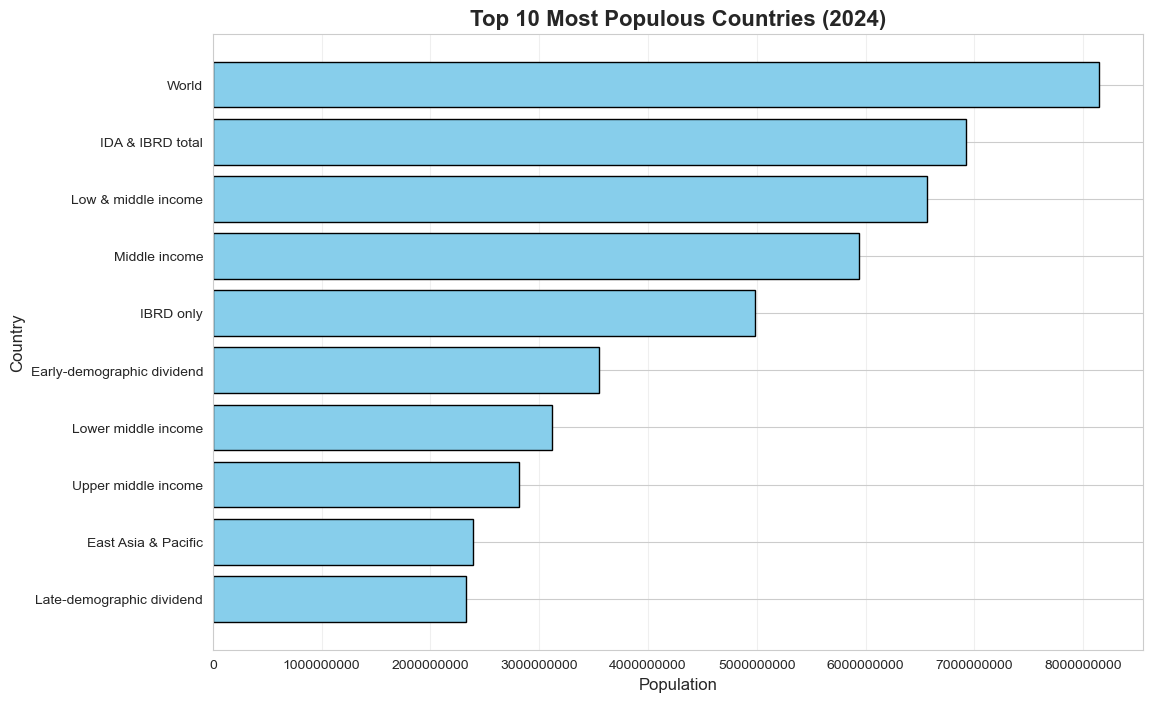

In [15]:
# Cell 6: Top 10 Most Populous Countries (Latest Year)
latest_year = df_clean['Year'].max()
latest_data = df_clean[df_clean['Year'] == latest_year]
top_10_countries = latest_data.nlargest(10, 'Population')

plt.figure(figsize=(12, 8))
plt.barh(top_10_countries['Country Name'], 
         top_10_countries['Population'],
         color='skyblue', edgecolor='black')
plt.title(f'Top 10 Most Populous Countries ({latest_year})', 
          fontsize=16, fontweight='bold')
plt.xlabel('Population', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.gca().invert_yaxis()
plt.ticklabel_format(style='plain', axis='x')
plt.grid(axis='x', alpha=0.3)
plt.savefig('../visualizations/top10_countries.png', dpi=300, bbox_inches='tight')
plt.show()


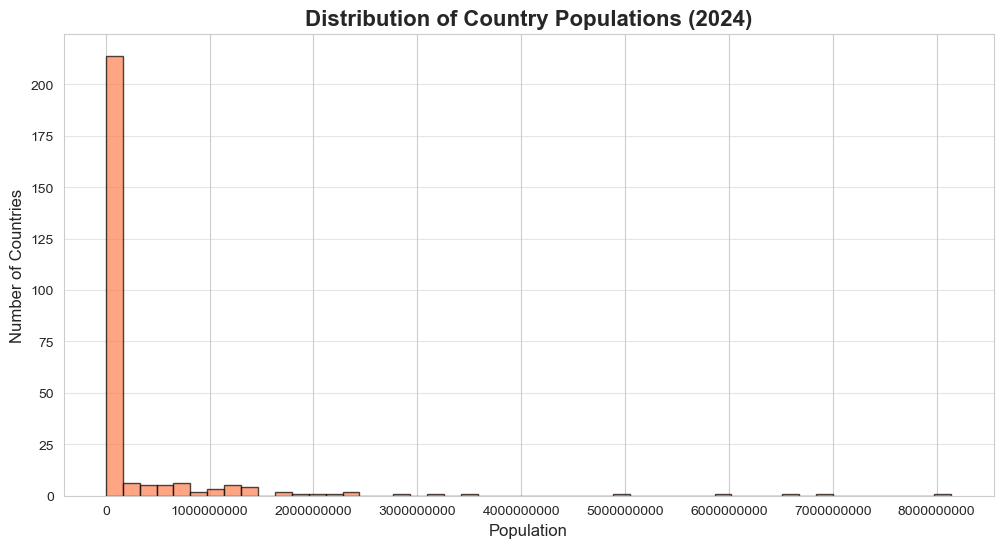

In [16]:
# Cell 7: Population Distribution Histogram
plt.figure(figsize=(12, 6))
# Use log scale because of huge variation
plt.hist(latest_data['Population'].dropna(), 
         bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.title(f'Distribution of Country Populations ({latest_year})', 
          fontsize=16, fontweight='bold')
plt.xlabel('Population', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.ticklabel_format(style='plain', axis='x')
plt.savefig('../visualizations/population_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

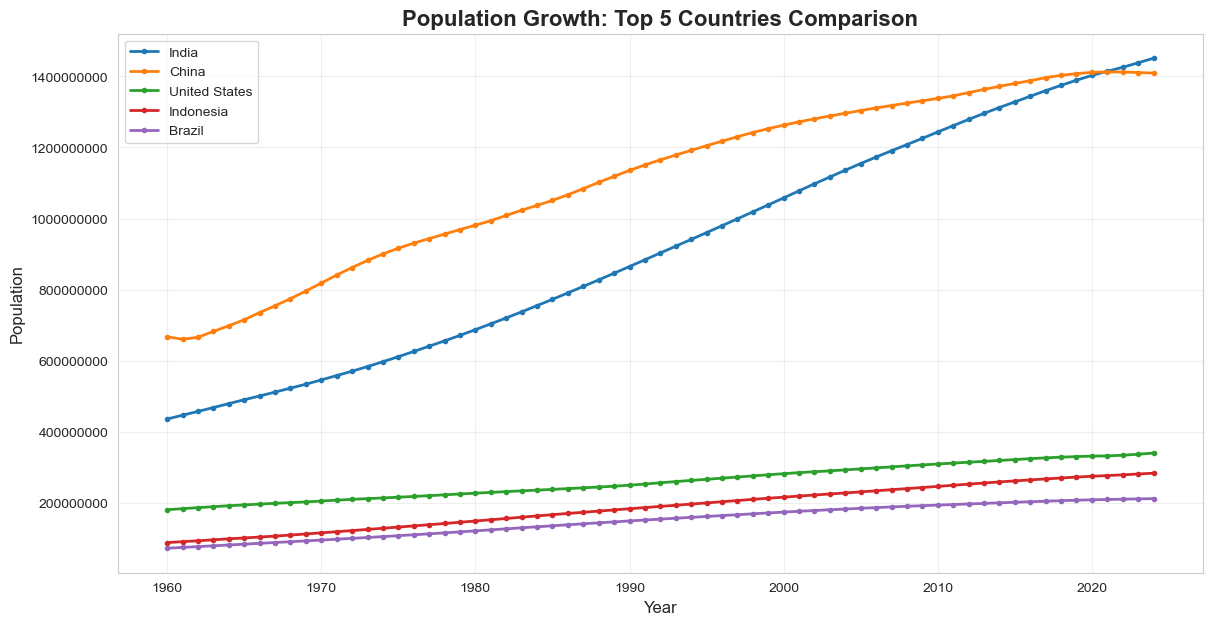

In [17]:
# Cell 8: Compare Specific Countries Over Time
countries_to_compare = ['India', 'China', 'United States', 'Indonesia', 'Brazil']

plt.figure(figsize=(14, 7))
for country in countries_to_compare:
    country_data = df_clean[df_clean['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Population'], 
             marker='o', linewidth=2, label=country, markersize=3)

plt.title('Population Growth: Top 5 Countries Comparison', 
          fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('../visualizations/country_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# Cell 9: Statistical Summary
print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
print(f"\nTotal Countries/Regions: {df_clean['Country Name'].nunique()}")
print(f"Years Covered: {df_clean['Year'].min()} - {df_clean['Year'].max()}")
print(f"\nGlobal Population ({latest_year}): {latest_data['Population'].sum():,.0f}")
print(f"\nAverage Country Population: {latest_data['Population'].mean():,.0f}")
print(f"Median Country Population: {latest_data['Population'].median():,.0f}")
print(f"Largest Country: {top_10_countries.iloc[0]['Country Name']} "
      f"({top_10_countries.iloc[0]['Population']:,.0f})")
# Save cleaned data for reproducibility
import os
os.makedirs('../data/processed', exist_ok=True)
df_clean.to_csv('../data/processed/population_cleaned.csv', index=False)
print("✓ Cleaned dataset saved to: data/processed/population_cleaned.csv")
print(f"  Rows: {len(df_clean):,}")
print(f"  Columns: {len(df_clean.columns)}")



STATISTICAL SUMMARY

Total Countries/Regions: 265
Years Covered: 1960 - 2024

Global Population (2024): 87,950,031,974

Average Country Population: 331,886,913
Median Country Population: 10,876,981
Largest Country: World (8,142,056,446)
✓ Cleaned dataset saved to: data/processed/population_cleaned.csv
  Rows: 17,195
  Columns: 4
